In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from funciones_toolbox_ml_final import *
from bootcampviztools import *
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


# CLASIFICACIÓN

### Cargamos el dataset que usaremos para el modelo de clasificación

In [30]:
df_bank = pd.read_csv('./data/bank.csv')
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [31]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [32]:
tipifica_variables(df_bank,15, 30)

,nombre_variable,tipo_sugerido
0,age,Numerica Discreta
1,job,Categorica
2,marital,Categorica
3,education,Categorica
4,default,Binaria
5,balance,Numerica Continua
6,housing,Binaria
7,loan,Binaria
8,contact,Categorica
9,day,Numerica Discreta


In [33]:
describe_df(df_bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
Tipo,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object
Porcentaje_Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores_Unicos,76,12,3,4,2,3805,2,2,3,31,12,1428,36,472,34,4,2
Porcentaje_Cardinalidad,0.680882,0.107508,0.026877,0.035836,0.017918,34.088873,0.017918,0.017918,0.026877,0.277728,0.107508,12.793406,0.322523,4.228633,0.304605,0.035836,0.017918


### Dividimos en train y test y seleccionamos el target

In [34]:
train_set, test_set = train_test_split(df_bank, test_size = 0.2, random_state = 42)
target = "deposit"

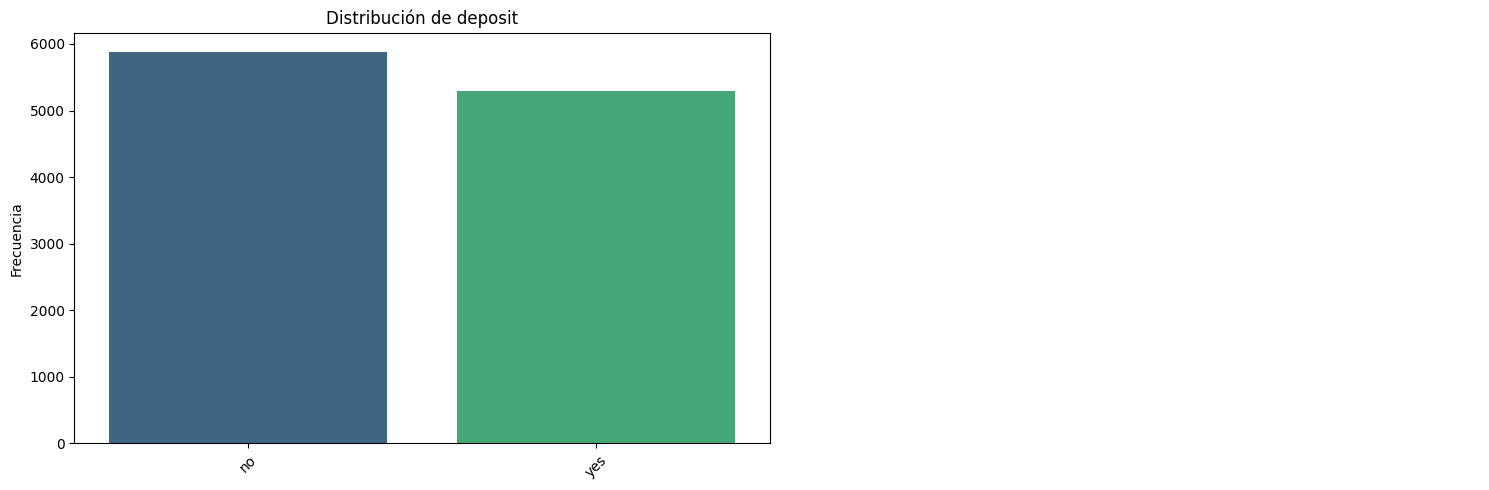

In [35]:
pinta_distribucion_categoricas(df_bank,[target])

### MINIEDA: Hacemos la selección de features

In [36]:
get_features_num_classification(train_set,target)


 Las siguientes columnas pasaron el test de significancia:


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [37]:
get_features_num_classification(train_set,target,0.00000001)#vemos cómo funciona par casos de pvalue muuuy bajos

Las siguientes columnas no pasaron el test de significancia:
['age', 'day']

 Las siguientes columnas pasaron el test de significancia:


['balance', 'duration', 'campaign', 'pdays', 'previous']


 Las siguientes columnas pasaron el test de significancia:


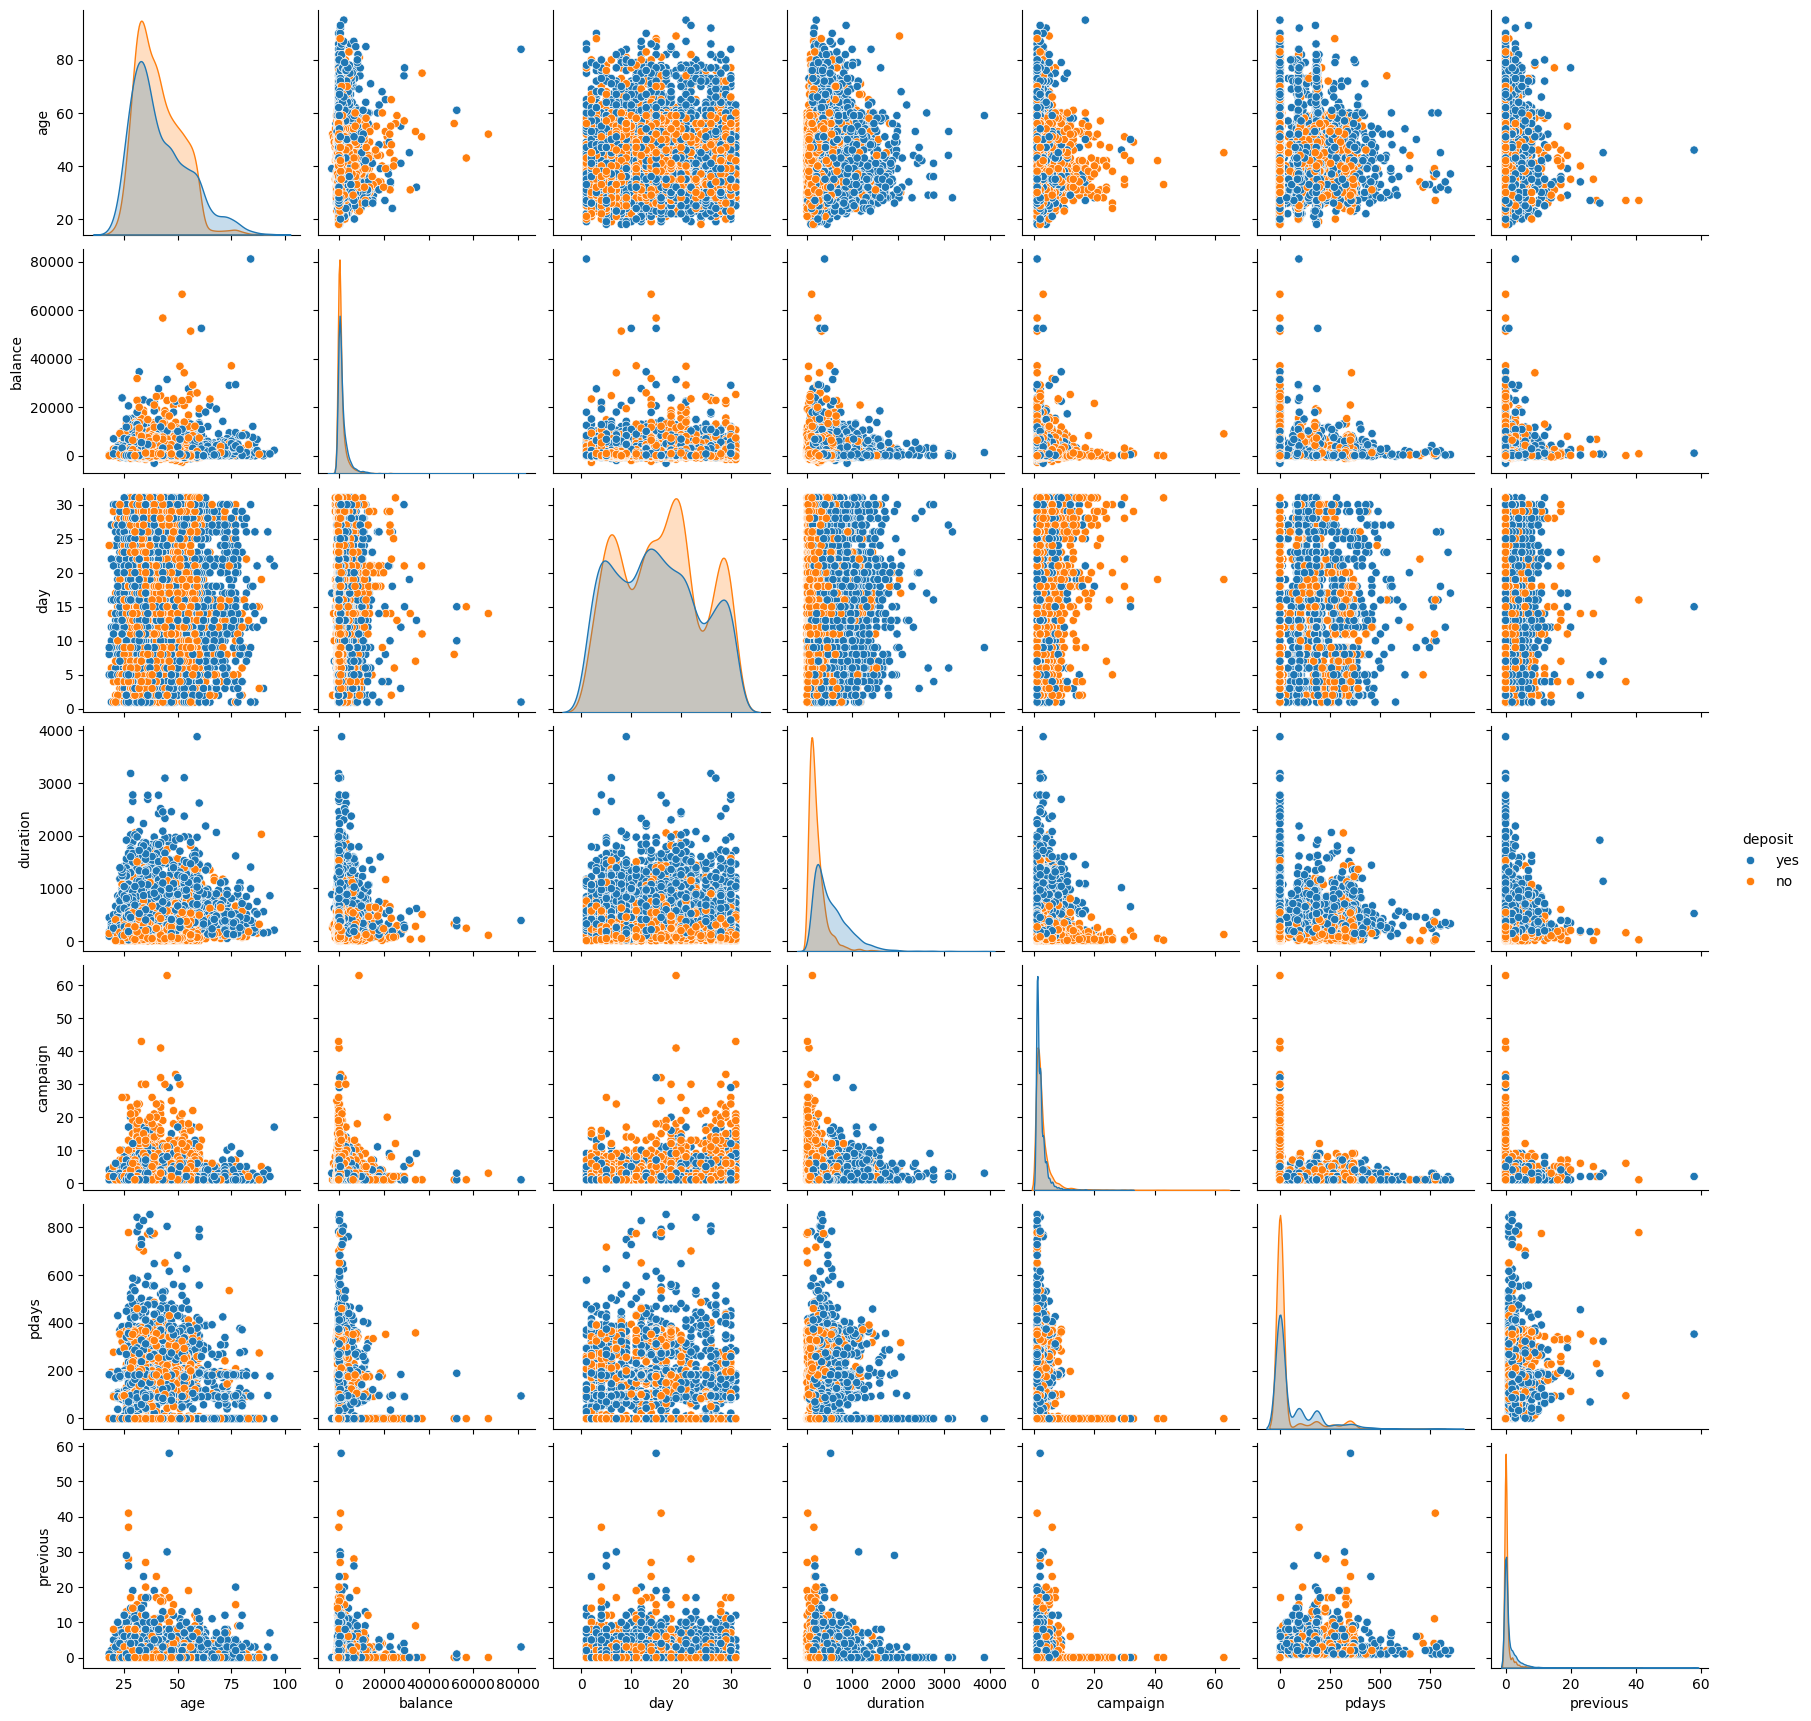

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [38]:
plot_features_num_classification(train_set, target)

In [39]:
get_features_cat_classification(train_set, target, mi_threshold=0.2)

['balance', 'duration']

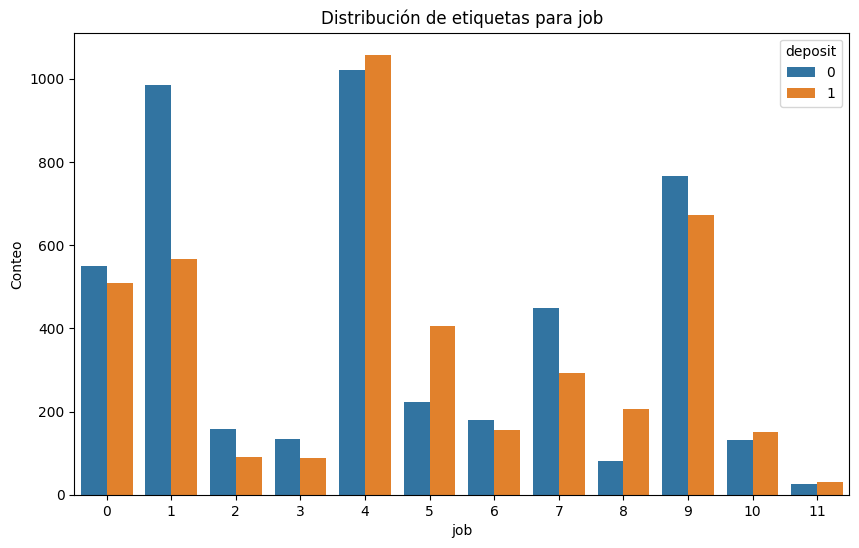

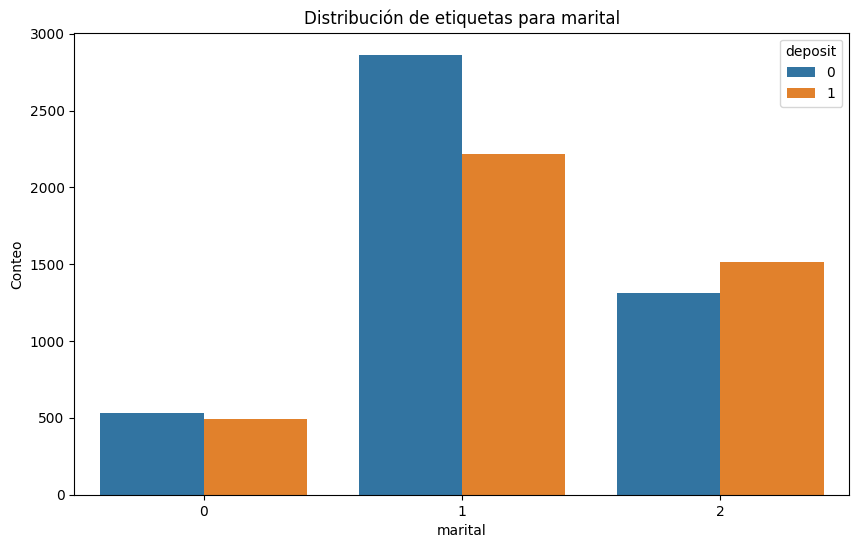

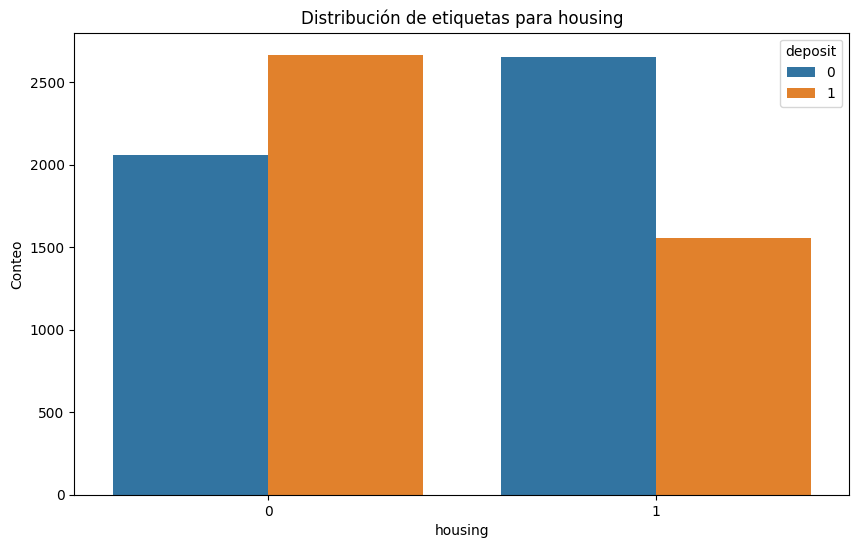

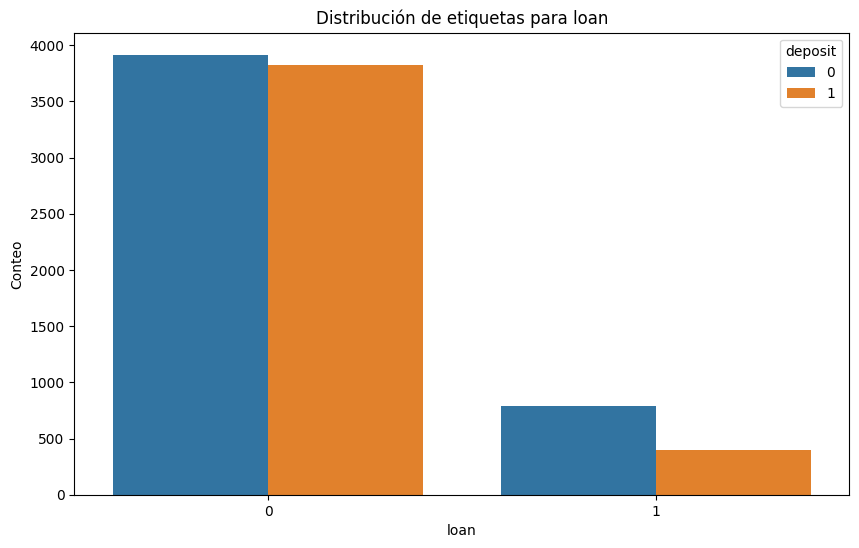

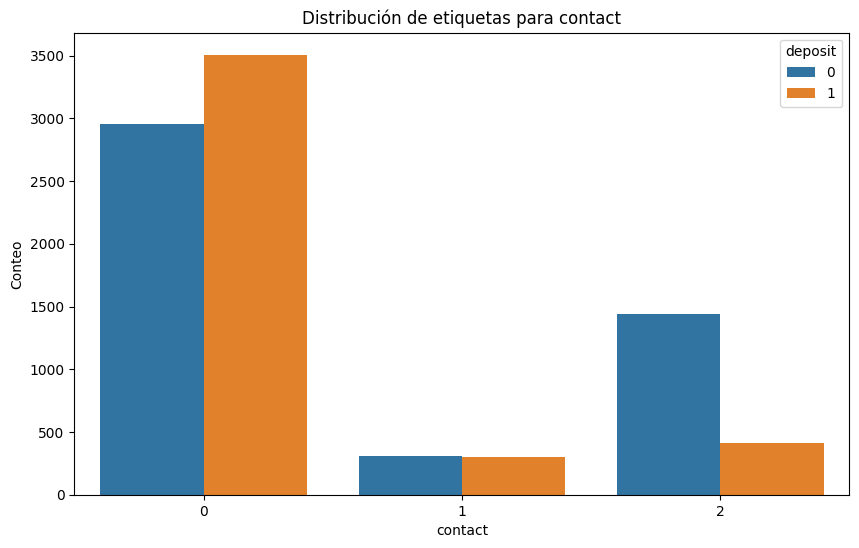

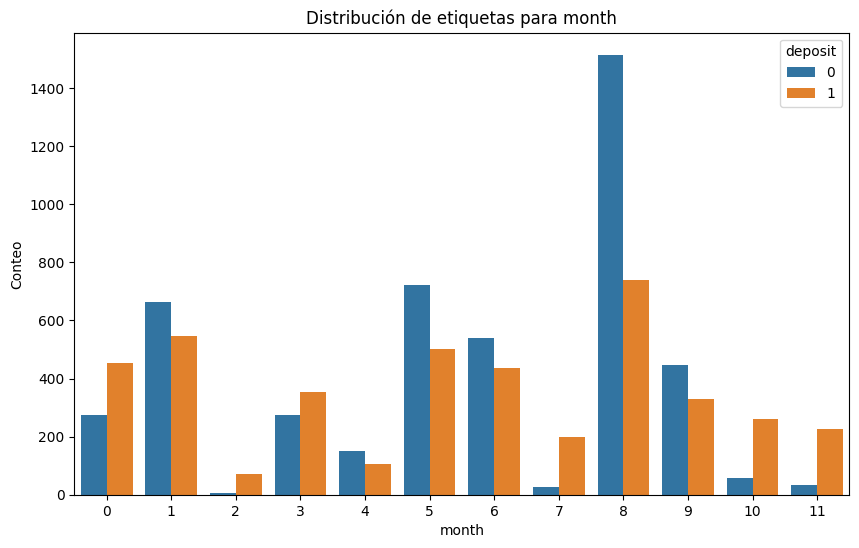

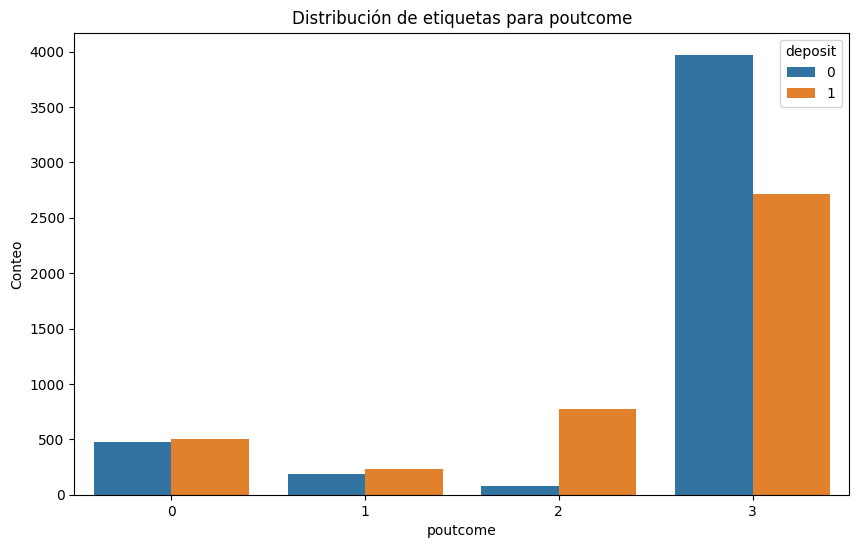

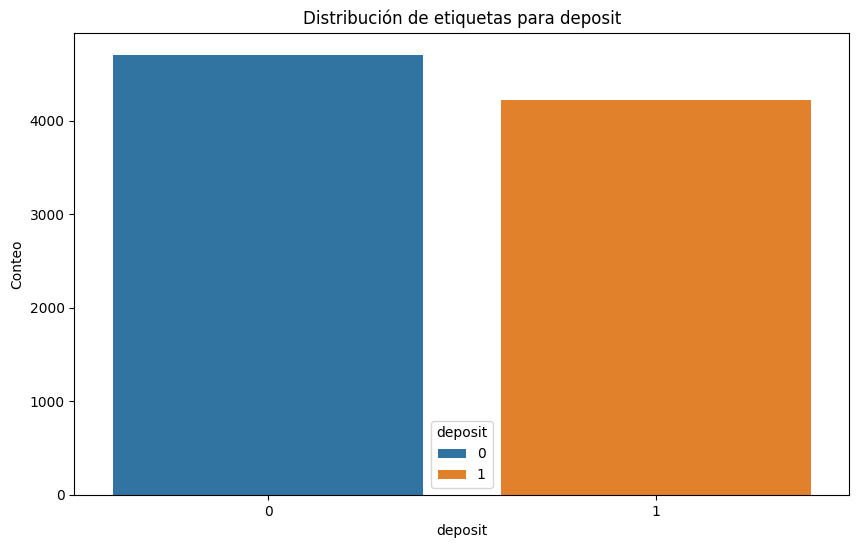

In [40]:
plot_features_cat_classification(train_set,target)

In [41]:
df_numerical = train_set.select_dtypes(include=[np.number])
df_numerical['deposit'] = df_bank['deposit'].map({'yes': 1, 'no': 0})


### Aplicamos un árbol para selección de features

In [42]:
X = df_numerical.drop('deposit', axis=1)
y = df_numerical['deposit']

dt = DecisionTreeClassifier(max_depth= 10, random_state=42)
dt.fit(X, y)

df_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)


In [43]:
# Nos quedamos con las 4 variables más importantes
X = df_numerical[df_feature_importances['feature'].values[:4]]

In [44]:
X_train = train_set[X.columns]
y_train = train_set[target]

X_test = test_set[X.columns]
y_test = test_set[target]

### Escalamos los datos

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creamos el modelo

In [46]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

### Evaluación del modelo

In [47]:
eval_model(y_test,y_pred,"clasificación",["RECALL","PRECISION"])

Recall: 0.7262647875369136
Precision: 0.7339797190590973


(0.7262647875369136, 0.7339797190590973)

# REGRESIÓN

### Cargamos el dataset para crear un modelo de regresión

In [48]:
df_temps = pd.read_csv('./data/temps.csv')
df_temps.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [49]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [50]:
describe_df(df_temps)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
Tipo,int64,int64,int64,object,int64,int64,float64,int64,int64,int64,int64,int64
Porcentaje_Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores_Unicos,1,12,31,7,56,56,243,55,37,37,36,66
Porcentaje_Cardinalidad,0.287356,3.448276,8.908046,2.011494,16.091954,16.091954,69.827586,15.804598,10.632184,10.632184,10.344828,18.965517


In [51]:
tipifica_variables(df_temps,15, 30)

,nombre_variable,tipo_sugerido
0,year,Categorica
1,month,Categorica
2,day,Numerica Discreta
3,week,Categorica
4,temp_2,Numerica Discreta
5,temp_1,Numerica Discreta
6,average,Numerica Continua
7,actual,Numerica Discreta
8,forecast_noaa,Numerica Discreta
9,forecast_acc,Numerica Discreta


### Dividimos en train y test y seleccionamos el target

In [52]:
train_set_temps, test_set_temps = train_test_split(df_temps, test_size = 0.2, random_state = 42)
target_temps = "actual"

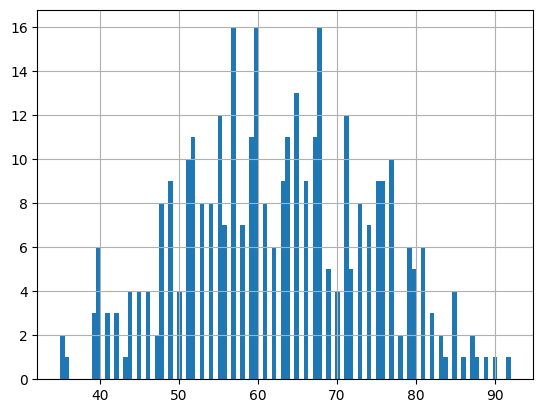

In [53]:
df_temps[target_temps].hist(bins=100);#echamos un vistazo al target

### MINIEDA: Selección de features

In [54]:
get_features_num_regression(train_set_temps, target_temps,umbral_corr=0.5)

['temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

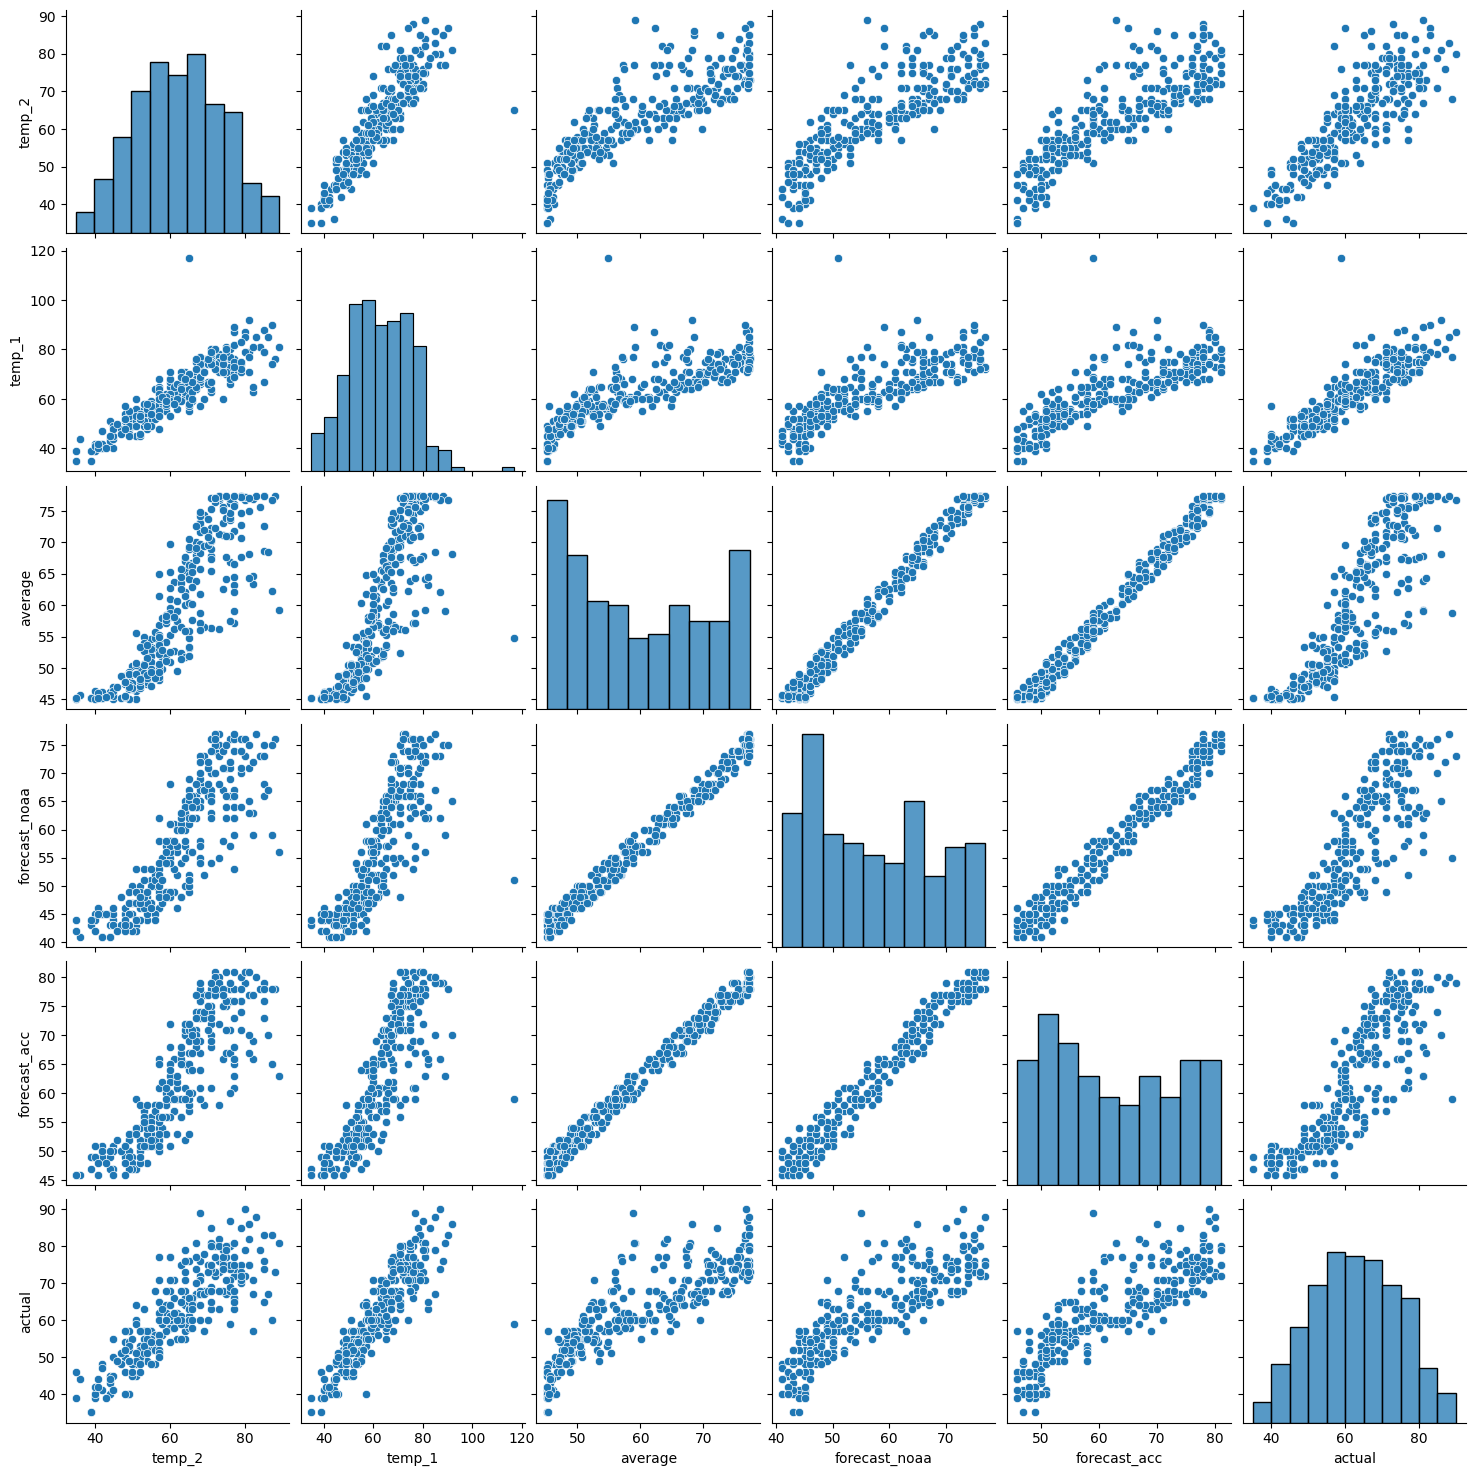

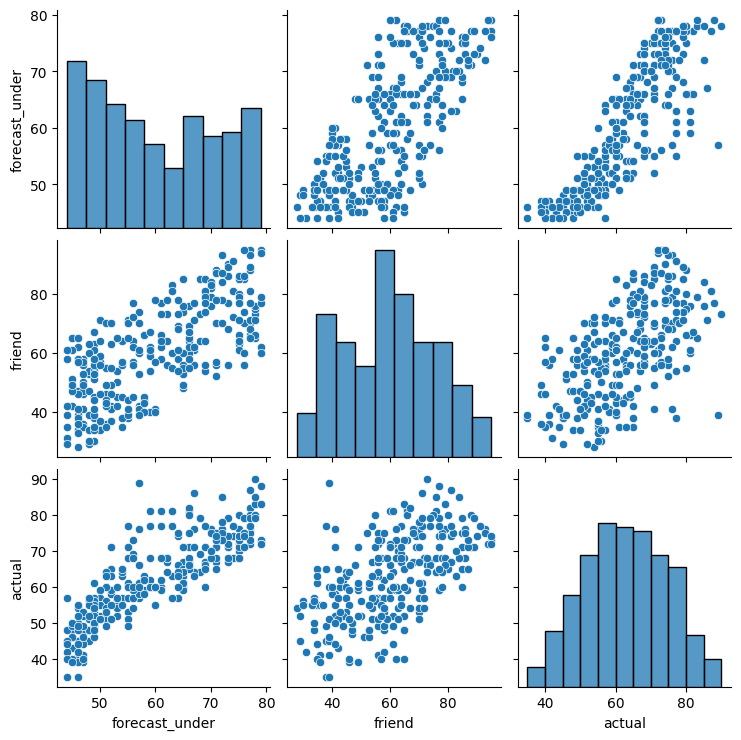

['temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend']

In [55]:
plot_features_num_regression(train_set_temps, target_temps, umbral_corr=0.5)

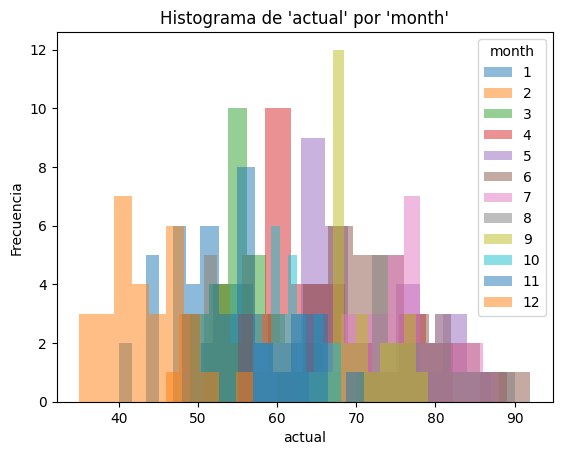

['month']

In [56]:
plot_features_cat_regression(df_temps,target_temps,columns=["month"],pvalue=0.05 , with_individual_plot=True)

In [57]:
plot_features_cat_regression(df_temps,"actual",columns=["month"],pvalue=0.00 , with_individual_plot=True)#aquí para un pvalue 0 no da resultados

[]

### Tratamiento de features

In [58]:
y_train_set_temps=train_set_temps["actual"]
y_test_set_temps=test_set_temps["actual"]
X_train_set_temps=train_set_temps.drop("actual",axis=1,inplace=True)
X_test_set_temps=test_set_temps.drop("actual",axis=1,inplace=True)

In [59]:
X_train_set_temps = pd.get_dummies(train_set_temps).drop(columns=['year'])
X_test_set_temps = pd.get_dummies(test_set_temps).drop(columns=['year'])

### Creamos el modelo

In [60]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_set_temps,y_train_set_temps)
y_pred_reg = dtr.predict(X_test_set_temps)


MAE: 4.8428571428571425
MAPE: 0.07514737607468014


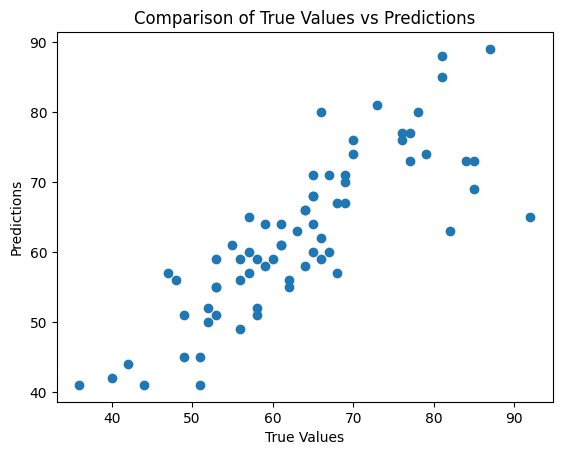

(4.8428571428571425, 0.07514737607468014)

In [61]:
eval_model(y_test_set_temps,y_pred_reg,"regresión",["MAE","MAPE","GRAPH"])